# <center>$\underline{\textbf{AAG03 - Distribuições Estatisticas}}$<p>
<center> Braulio Lucas - 5° Periodo - Sistemas de Informação <p>
<center> Christian Scoralich - 3° Periodo - Ciencias da Computação

## $\textbf{1. Importando Bibliotecas}$

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

## $\textbf{2. Distribuições}$

## $\textbf{2.1 Poisson}$

Se a probabilidade média de um evento ocorrer por unidade de tempo for dada, e for perguntado a probabilidade de n eventos ocorrerem dentro de um tempo, é melhor utilizar Poisson. A Poisson também pode ser descrita como um limite da distribuição Binomial.

Em uma determinada empresa de Usinagem se produzem 30 peças em média por hora, qual é a chance dos funcionarios extremamente motivados produzirem 38 peças ?

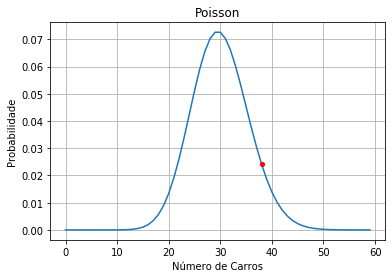

In [35]:
from scipy.stats import poisson
plt.ylabel('Probabilidade')
plt.xlabel('Número de Carros')
plt.title('Poisson')
arr = []
rv = poisson(30)
for num in range(0,60):
 arr.append(rv.pmf(num))

prob = rv.pmf(38)
plt.grid(True)
plt.plot(arr, linewidth=1.5)
plt.plot([38], [prob], marker='o', markersize=4, color="red")
plt.show()


## $\textbf{2.2 Binomial}$

Dado a probabilidade exata de um evento ocorrer e for perguntado a probabilidade de vezes do evento ocorrer em k vezes de n eventos, a distribuição binomial é melhor utilizada

Em um determinado jogo de RPG, um personagem quando desfere um ataque tem 35% de chance de realizar um golpe critico, qual a chance de ocorrer 1 golpe crítico em 8 ataques desferidos ?


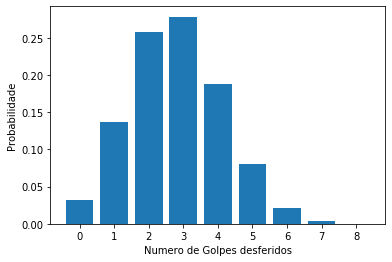

In [72]:
from scipy.stats import binom

n= 8 # número de tentativas

p= 0.35 # probabilidade de Golpe Crítico

x= range(0,n+1) # contagem dos sucessos

px = binom.pmf(x,n,p)

plt.bar(x,px)
plt.xticks(range(0,9))
plt.ylabel("Probabilidade")
plt.xlabel("Numero de Golpes desferidos")
plt.show()



## $\textbf{2.3 Gaussiana(Normal)}$

Como todo toda mensuração está disposta a um erro de mensuração e medida, a distribuição Gaussiana(Normal) demonstra que quanto maior a quantidade de experimentos executados, independente das variações cerca de 68% está dentro da área μ-σ, 0 e μ+σ. Provando que em grandes quantidades de experimentos o resultado seria normal. Auxiliando também a provar a Lei dos Grandes Números.

Abaixo seguem 2 exemplos com geração de numeros randomicos entre 0 e 1 para provar o Teorema do limite central.

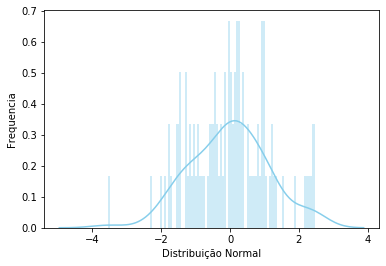

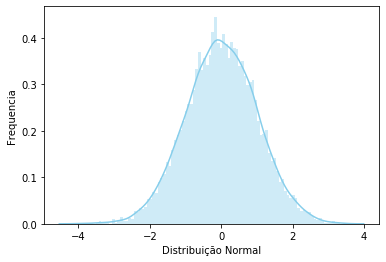

In [103]:
from scipy.stats import norm
#Gera numeros randomicos entre 0 e 1, Exemplo com tamanho 100
data_normal = norm.rvs(size=100,loc=0,scale=1)

ax = sns.distplot(data_normal,
                  bins=100,
                  kde=True,
                  color='skyblue')
ax.set(xlabel='Distribuição Normal', ylabel='Frequencia')
plt.show()

#Gera numeros randomicos entre 0 e 1, Exemplo com tamanho 10000
data_normal = norm.rvs(size=10000,loc=0,scale=1)

ax = sns.distplot(data_normal,
                  bins=100,
                  kde=True,
                  color='skyblue')
ax.set(xlabel='Distribuição Normal', ylabel='Frequencia')
plt.show()

## $\textbf{2.4 Exponencial}$

A distribuição exponencial descreve a chance de ocorrencia de um evento entre 2 espaços de tempo definidos.

Dado uma transmissão ao vivo que tem 4000 usuarios, qual a probabilidade que vão demorar para 6 usuarios chegarem, sendo que a transmissão dura 1 hora ?


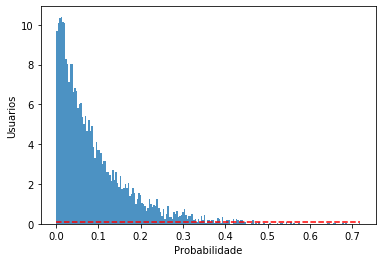

In [123]:
L = 4000/60

T = 6/L

Y = np.random.exponential(T, 5000)
plt.hist(Y, density=True, bins=200,lw=0,alpha=.8)
plt.plot([0,max(Y)],[T,T],'r--')
plt.xlabel('Probabilidade')
plt.ylabel('Usuarios')
plt.show()

## $\textbf{2.5 Bernoulli}$

## $\textbf{2.6 Geometrica}$

## $\textbf{2.7 Uniforme}$